In [3]:
#import pybedtools

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

from scipy.stats import pearsonr, spearmanr
import glob

# Read Data

In [4]:
def flatten_tissues_expand_df(tfbs_df):
    tfbs_part_repeat = tfbs_df.iloc[:,:9]
    tfbs_part_flatten = tfbs_df.iloc[:,9:]
    
    repeat_df =  pd.DataFrame(np.repeat(tfbs_part_repeat.values, tfbs_part_flatten.shape[1], axis=0))
    flatten_arr = tfbs_part_flatten.to_numpy().flatten()

    tissue_repeat = np.tile(np.array(tfbs_part_flatten.columns), len(tfbs_part_repeat))
    
    repeat_df.columns = tfbs_part_repeat.columns
    repeat_df["GeneExpr"] = flatten_arr
    repeat_df["Tissue"] = tissue_repeat
    

    return repeat_df

In [5]:
path = "/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Single_TFBS/All_TFBS.csv"
#path = r"H:\Uni - iCloud - Alte Semester\BA\All_TFBS.csv"
df_combined = pd.read_csv(path)
df_combined = df_combined[df_combined["chr"] != "chrM"]

,chr,geneID,tf,close_tss,dist_tss,strand_orientation,homotypic_count,all_tfbs_count,all_tfbs_unique_count,Adipose - Subcutaneous,...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
89573,chr10,ENSG00000120053.10,chrf28811,117,124,T,1,77,64,17.700,...,31.270,34.520,43.320,25.650,58.120,71.560,41.440,25.710,35.470,3.850
89574,chr1,ENSG00000158882.14,chrf28811,74,81,T,1,35,30,10.420,...,9.463,10.340,11.780,10.810,8.127,4.457,10.190,12.280,9.962,7.457
89575,chr1,ENSG00000118217.5,chrf28811,12,19,T,1,113,76,18.730,...,18.765,20.710,13.240,15.570,12.540,14.840,20.110,22.495,16.960,18.420
89576,chr11,ENSG00000170325.14,chrf28811,126,133,T,1,36,27,5.288,...,6.553,6.570,5.079,5.408,3.440,4.812,6.694,6.957,7.064,2.287
89577,chr1,ENSG00000117614.9,chrf28811,22,29,T,1,70,55,52.170,...,37.900,38.480,36.190,37.370,30.880,25.650,48.790,56.320,44.385,20.430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89710,chrX,ENSG00000180964.16,chrf28811,69,76,nT,1,34,29,58.610,...,49.915,51.850,46.340,55.460,40.400,61.110,75.410,91.615,63.940,6.947
89711,chr9,ENSG00000137100.15,chrf28811,94,101,nT,1,79,68,27.210,...,36.545,38.590,18.840,24.610,19.830,22.570,38.260,38.515,33.405,15.490
89712,chr9,ENSG00000187866.8,chrf28811,169,176,nT,1,109,69,19.640,...,13.275,14.540,12.610,15.590,10.420,12.690,19.570,24.460,17.810,5.242
89713,chr7,ENSG00000198556.13,chrf28811,26,33,nT,1,94,64,5.642,...,5.885,6.552,9.512,9.286,4.731,15.790,11.530,10.285,7.202,1.563


In [92]:
flat_df = flatten_tissues_expand_df(df_combined)

Variance between Tissues

In [93]:
# Calculate Variance of Geneexpression between Tissues
expr_mat = df_combined.iloc[:,9:].to_numpy()
variance = np.var(expr_mat, axis=1)

# Set the threshold as the median variance. This can be changed!
threshold = np.median(variance)

# Get new Dataframes, with genes with similiar expression
genes_with_similar_expression = df_combined.iloc[np.where(variance < threshold)[0]]
genes_with_similar_expression_flat = flatten_tissues_expand_df(genes_with_similar_expression)# Calculate Variance of Geneexpression between Tissues
expr_mat = df_combined.iloc[:,9:].to_numpy()
variance = np.var(expr_mat, axis=1)

# Set the threshold as the median variance. This can be changed!
threshold = np.median(variance)

# Get new Dataframes, with genes with similiar expression
genes_with_similar_expression = df_combined.iloc[np.where(variance < threshold)[0]]
genes_with_similar_expression_flat = flatten_tissues_expand_df(genes_with_similar_expression)

# Plot

## Relationship between TSS-TFBS distance, Geneexpression and strand orientation 

Chr22, JUN

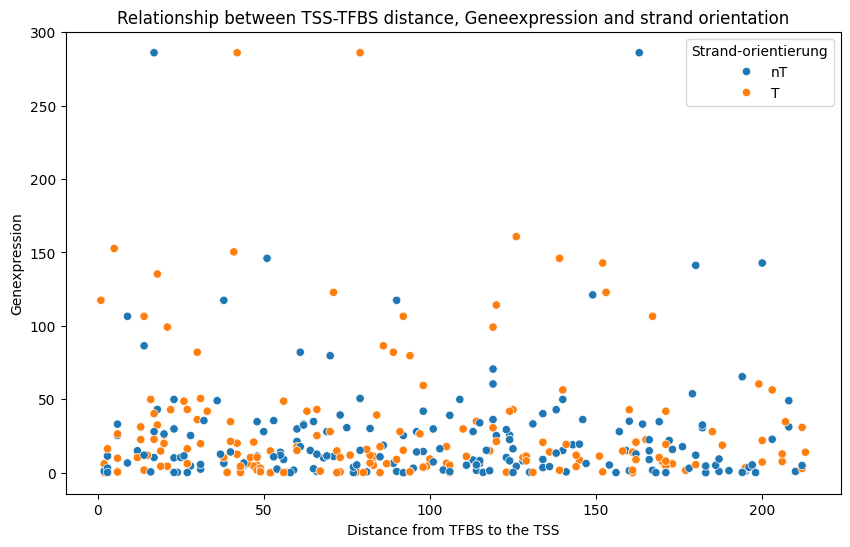

In [36]:
#ChatGPT, Plot der die Beziehung zwischen der Entfernung der TFBS zum TSS und dem Genexpressionswert für verschiedene Strandorientierungen darstellt:
df = df_combined[(df_combined["chr"]=="chr22") & (df_combined["tf"]=="ESR1")]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='dist_tss', y='Stomach', hue='strand_orientation')
plt.xlabel('Distance from TFBS to the TSS')
plt.ylabel('Genexpression')
plt.title('Relationship between TSS-TFBS distance, Geneexpression and strand orientation')
plt.legend(title='Strand-orientierung')
plt.show()

In [68]:
flat_df

,chr,geneID,tf,close_tss,dist_tss,strand_orientation,homotypic_count,all_tfbs_count,all_tfbs_unique_count,GeneExpr,Tissue
0,chr1,ENSG00000163209.14,HMBOX1,159,169,nT,1,24,20,0.691,Adipose - Subcutaneous
1,chr1,ENSG00000163209.14,HMBOX1,159,169,nT,1,24,20,1.043,Adipose - Visceral (Omentum)
2,chr1,ENSG00000163209.14,HMBOX1,159,169,nT,1,24,20,1.906,Adrenal Gland
3,chr1,ENSG00000163209.14,HMBOX1,159,169,nT,1,24,20,1.397,Artery - Aorta
4,chr1,ENSG00000163209.14,HMBOX1,159,169,nT,1,24,20,1.385,Artery - Coronary
...,...,...,...,...,...,...,...,...,...,...,...
37849459,chr7,ENSG00000128512.20,STAT5B,105,120,T,1,104,79,2.226,Testis
37849460,chr7,ENSG00000128512.20,STAT5B,105,120,T,1,104,79,7.504,Thyroid
37849461,chr7,ENSG00000128512.20,STAT5B,105,120,T,1,104,79,11.100,Uterus
37849462,chr7,ENSG00000128512.20,STAT5B,105,120,T,1,104,79,6.597,Vagina


## Heatmap to visualize Genexpression per Tissue

In [43]:
# Heatmap to mao geneexpression values for each TF and each Tissue

pivot_df = flat_df.pivot_table(index="tf", columns="Tissue", values="GeneExpr", aggfunc="mean")

In [322]:
#pivot_df.to_csv("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Single_TFBS/Working_Notes/mean_GenExr_for_all_TFBS_in_tissue.csv", index=False)
mean_log2_expr_per_tissue = np.log2(pivot_df)
mean_log2_expr_per_tissue

Tissue,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
tf,,,,,,,,,,,,,,,,,,,,,
AR,5.466673,5.363304,5.010257,5.644713,5.542441,5.619403,5.447612,4.274780,4.456816,4.374026,...,5.516352,5.532952,5.089825,5.364833,4.809308,5.255560,5.532606,5.695572,5.718723,5.037295
ARNT,5.498638,5.381525,5.011290,5.687544,5.558273,5.666414,5.454607,4.320452,4.533527,4.435959,...,5.471898,5.494594,5.062507,5.348135,4.812835,5.283660,5.539254,5.703735,5.541353,4.724118
ARNTL,5.237593,5.001961,4.798820,5.439642,5.272634,5.480476,5.086830,3.956862,4.154711,4.209792,...,5.244408,5.311910,4.806319,5.112520,4.482576,5.184779,5.324876,5.378316,5.235370,3.946262
ASCL1,4.993981,4.864259,4.832829,5.386467,5.187491,5.336081,5.002589,3.962791,4.173620,4.113725,...,5.162280,5.225985,4.771907,4.976550,4.497821,5.090959,5.210566,5.278419,5.131788,4.175793
ATF2,5.728198,5.676475,5.357673,5.968843,5.853678,5.980485,5.598503,4.672412,4.865510,4.637638,...,5.628730,5.616620,5.198484,5.501705,5.065843,5.545521,5.680393,5.957794,5.790210,4.742954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZFX,5.710155,5.606721,5.180322,6.016943,5.870256,6.002708,5.702384,4.402109,4.557536,4.509896,...,5.693915,5.701231,5.319312,5.578436,5.039806,5.446206,5.802524,5.961597,5.853401,4.819910
ZNF143,5.599684,5.471286,5.104878,5.849874,5.723373,5.832508,5.553775,4.427102,4.595828,4.487907,...,5.516803,5.537438,5.147635,5.503897,4.884253,5.276196,5.575993,5.856253,5.600611,6.664008
ZNF263,5.246596,5.164624,5.033942,5.491833,5.364281,5.428262,5.224369,4.242618,4.477221,4.380926,...,5.304986,5.368705,4.851530,5.074274,4.604507,5.088172,5.346380,5.537366,5.376461,4.473011


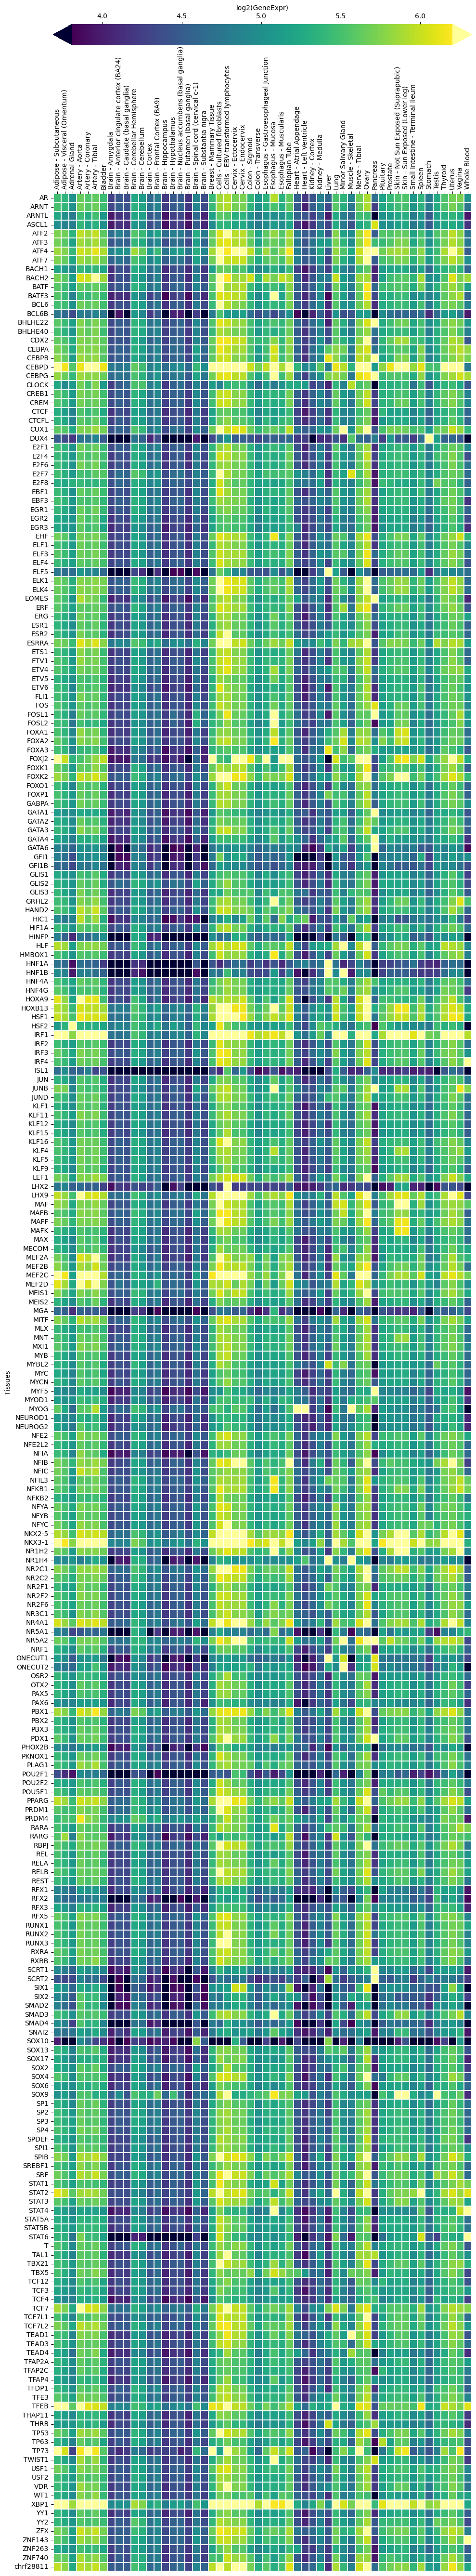

In [345]:
value_max = max(pivot_df.max())
value_min = min(pivot_df.min())

my_cmap = plt.get_cmap("viridis").copy()
my_cmap.set_over("#FFFF99")
my_cmap.set_under("#000033")

fig, ax = plt.subplots(figsize=(10, 62))
heatmap = sns.heatmap(mean_log2_expr_per_tissue,cmap=my_cmap, fmt=".2f", linewidths=0.01, cbar_kws={"orientation": "horizontal", "location":"top", "label":"log2(GeneExpr)", "extend":"both"}, robust=True)
#plt.title('Genexpression in different tissues')
plt.xlabel('TFBS')
plt.ylabel('Tissues')

ax.xaxis.tick_top()
ax.set_xlabel("")
ax.xaxis.set_label_position("top")
plt.xticks(rotation=90)


plt.tight_layout()
fig.savefig("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Single_TFBS/Heatmap/log2_mean_GenExr_diffrent_tissue_all_TFBS_ROBUST_extend.png")
plt.show()



### Genexpression per Promotor per tissue ?? 

gtex Data csv, --> sort by tissues with max(sum(EXPR))

In [346]:
unique_geneID = df_combined.drop_duplicates("geneID")

In [347]:
unique_geneID_expr = unique_geneID.iloc[:,9:]

In [348]:
unique_geneID["sumExpr"] = unique_geneID_expr.sum(axis=1)

/tmp/ipykernel_1496857/2429896092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_geneID["sumExpr"] = unique_geneID_expr.sum(axis=1)


In [349]:
# Sort by chr
def custom_sort_key(chr_value):
    if chr_value.startswith('chrX'):
        return 1000
    elif chr_value.startswith('chrY'):
        return 1001
    else:
        return int(chr_value[3:])
    
def chr_lst(chr):
    chr_unique = np.array([])
    chr_out = []
    for i in chr:
        if np.isin(i, chr_unique):
            chr_out.append(np.NAN)
        else:
            chr_out.append(i)
            chr_unique = np.append(chr_unique, i)
    return np.array(chr_out)
        

In [364]:
genexpr_sort = unique_geneID.sort_values(by="chr", key=lambda x: x.apply(custom_sort_key))
genexpr_sort_df = genexpr_sort.iloc[:,9:-1]


In [352]:
chr = list(genexpr_sort.chr)
chr_out = chr_lst(chr)
chr_out

array(['chr1', 'nan', 'nan', ..., 'nan', 'nan', 'nan'], dtype='<U32')

In [365]:
#s = genexpr_sort_df.sum()
#genexpr_sort_df = genexpr_sort_df[s.sort_values(ascending=False).index[:]]
log_genexpr_sort_df = np.log2(genexpr_sort_df)[np.log2(genexpr_sort_df) != -np.inf]


/sybig/home/jme/Bachelorarbeit/.venv/lib/python3.8/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


In [366]:
log_genexpr_sort_nona = log_genexpr_sort_df.dropna()

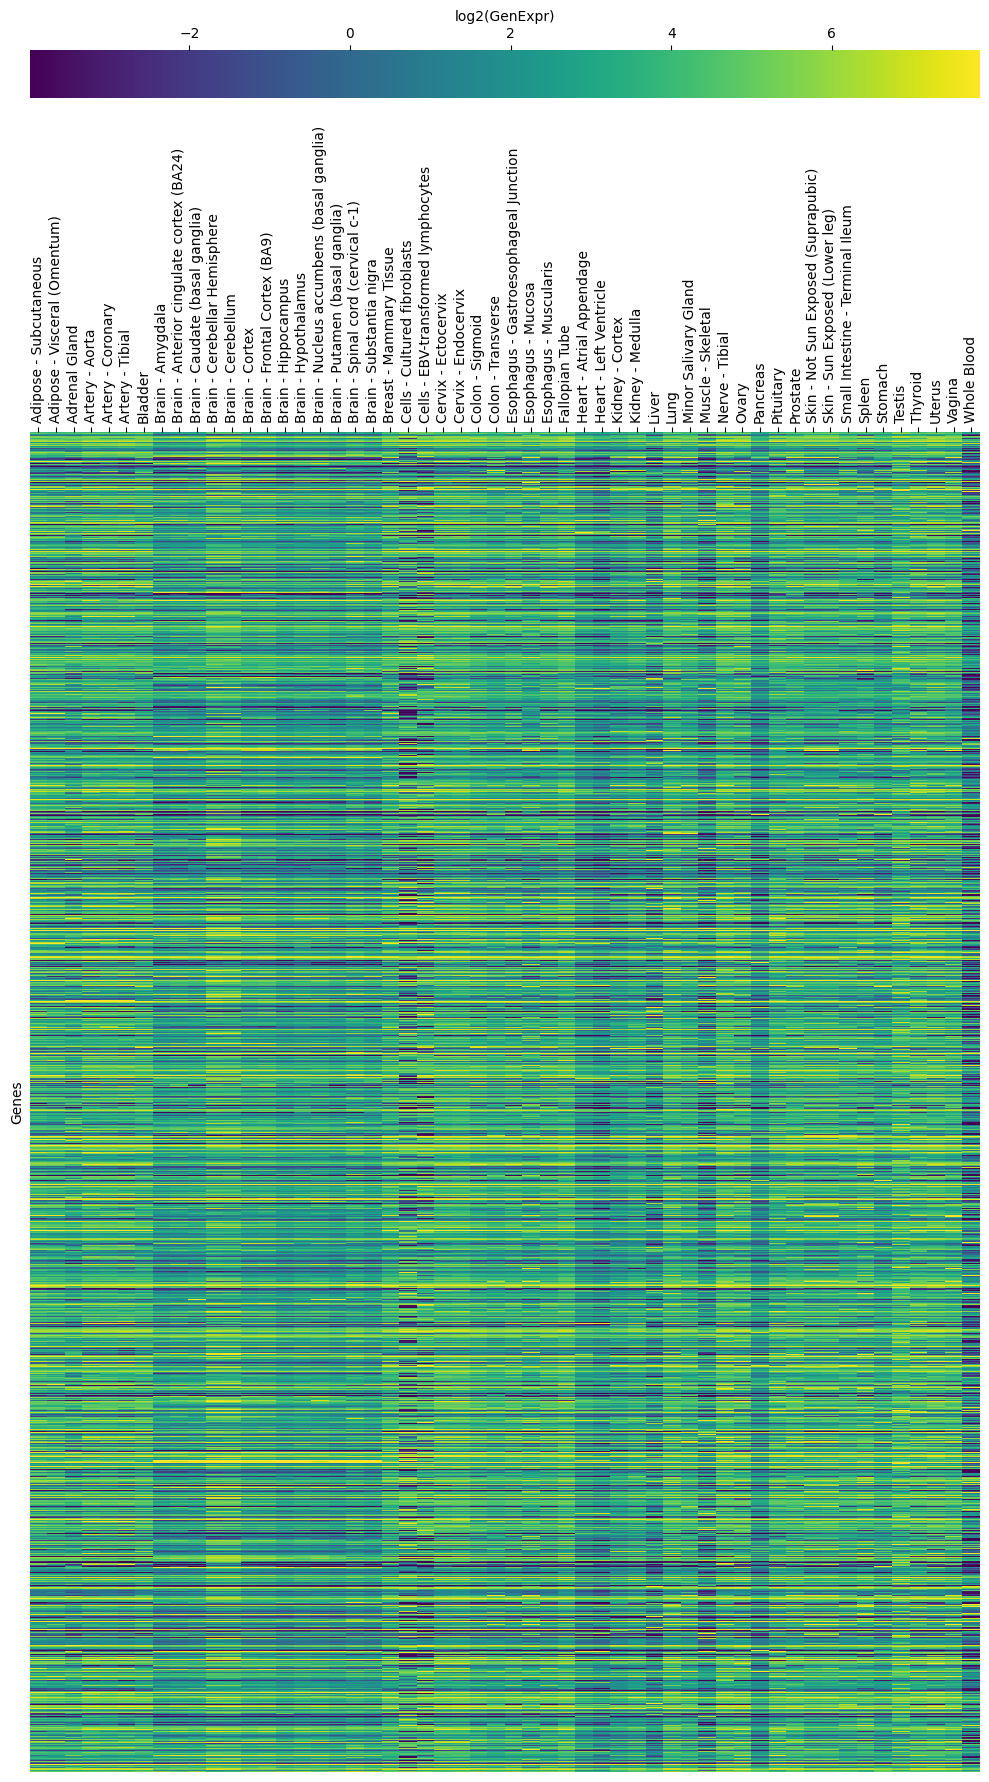

In [368]:
fig, ax = plt.subplots(figsize=(10, 20))
heatmap = sns.heatmap(log_genexpr_sort_nona,cmap="viridis", fmt=".2f", cbar_kws={"orientation": "horizontal", "location":"top","label":"log2(GenExpr)", "pad":0.17}, robust=True, yticklabels="")
#plt.title('Genexpression in different tissues')
#plt.xlabel('TFBS')
ax.set_ylabel('Genes')
#ax.set_yticks("")

ax.xaxis.tick_top()
ax.set_xlabel("")
ax.xaxis.set_label_position("top")
plt.xticks(rotation=90)


plt.tight_layout()
#fig.savefig("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Single_TFBS/Heatmap/log_GenExr_all_tissues_all_genes_sort_chr_tissue.png")
plt.show()


# Heatmap for Pearson Coreealation per tissue

In [94]:
df_combined

,chr,geneID,tf,close_tss,dist_tss,strand_orientation,homotypic_count,all_tfbs_count,all_tfbs_unique_count,Adipose - Subcutaneous,...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
0,chr1,ENSG00000163209.14,HMBOX1,159,169,nT,1,24,20,0.691,...,1.121,0.967,1.650,2.041,1.969,2.102,1.274,2.616,4285.500,0.483
1,chr1,ENSG00000143569.18,HMBOX1,9,19,T,1,12,11,50.840,...,49.715,53.410,35.470,39.380,26.340,65.410,60.040,65.595,55.225,17.250
2,chr10,ENSG00000213390.10,HMBOX1,47,57,nT,1,73,55,7.477,...,9.733,9.144,8.263,20.150,4.508,32.780,6.792,10.970,8.785,7.745
3,chr1,ENSG00000169241.17,HMBOX1,160,170,nT,1,115,81,31.560,...,41.695,40.380,46.890,52.560,33.060,22.880,46.590,30.335,32.340,18.380
4,chr1,ENSG00000185499.16,HMBOX1,173,183,nT,1,23,20,5.235,...,6.015,6.711,9.300,3.004,362.500,36.160,28.620,21.455,22.830,0.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700911,chr7,ENSG00000105851.10,STAT5B,-3,8,T,1,33,32,1.200,...,0.251,0.280,2.243,5.790,0.574,4.966,0.878,0.607,0.433,7.502
700912,chr7,ENSG00000075790.10,STAT5B,124,135,nT,1,31,26,20.870,...,12.365,11.990,8.953,9.601,8.210,30.260,37.430,29.180,21.870,2.035
700913,chr7,ENSG00000128590.4,STAT5B,54,69,T,1,71,59,25.350,...,19.705,16.970,20.790,25.160,24.560,53.610,42.800,36.135,23.670,8.608
700914,chr7,ENSG00000198839.9,STAT5B,56,71,nT,1,122,89,10.450,...,10.200,9.264,6.335,6.266,7.490,7.119,9.892,10.200,10.480,3.083


In [71]:
def get_pearson(df, tissue="GeneExpr"):
    tfs = df["tf"].unique()
    r_lst = []
    p_lst = []
    tf_lst = []
    for tf in tfs:
        df_tf = df[df["tf"] == tf]
        if len(df_tf) >= 2:
            r, p_value = pearsonr(df_tf["homotypic_count"], np.array(df_tf[tissue]))
            r_lst.append(r)
            p_lst.append(p_value)
            tf_lst.append(tf)
        else:
            print(f"{tf} has less then 2 entrys. No Correlation could be calculated")
    pearson_df = pd.DataFrame({"TFs":tf_lst, "Pearson_r":r_lst, "Pearson_p":p_lst})

    return pearson_df

    

In [200]:
def get_pearson_all_tissues(df):
    tfs = df["tf"].unique()
    tissues = np.array(df.columns[9:])
    
    # initialize Array with shape (0,54), This is important to vstack the 1D-Arrays for every tf, to genereate a 2D-array.
    r_all_tf = np.zeros([0,len(tissues)])
    p_all_tf = np.zeros([0,len(tissues)])

    tfs_lst = []
    for tf in tfs:
        df_tf = df[df["tf"] == tf]
        if len(df_tf) > 1:
            tfs_lst.append(tf)

            tfbs_counts = np.array(df_tf["homotypic_count"])
            expr = np.array(df_tf.iloc[:,9:])

            r_all_tissue = np.array([])
            p_all_tissue = np.array([])
            for tissue in range(len(tissues)):
                tissue_expr = expr[:,tissue]

                r, p = pearsonr(tfbs_counts, tissue_expr)
                r_all_tissue = np.append(r_all_tissue, r)
                p_all_tissue = np.append(p_all_tissue, p)
            # Appand r and p for single tfs into one big 2d array
            r_all_tf = np.vstack((r_all_tf, r_all_tissue))
            p_all_tf = np.vstack((p_all_tf, p_all_tissue))

        else:
            print(f"{tf} has only 1 entry. No Correlation could be calculated")
        # Add columns to DataFrame and set index to tf names
        r_df = pd.DataFrame(r_all_tf, columns=tissues)
        r_df.index = tfs_lst
        p_df = pd.DataFrame(p_all_tf, columns=tissues)
        p_df.index = tfs_lst       
        
    return r_df, p_df

In [182]:
r_df, p_df = get_pearson_all_tissues(df_combined)

/sybig/home/jme/Bachelorarbeit/.venv/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/sybig/home/jme/Bachelorarbeit/.venv/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/sybig/home/jme/Bachelorarbeit/.venv/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/sybig/home/jme/Bachelorarbeit/.venv/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/sybig/home/jme/Bachelorarbeit/.venv/lib/pyt

NR5A1 has less then 2 entrys. No Correlation could be calculated


/sybig/home/jme/Bachelorarbeit/.venv/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/sybig/home/jme/Bachelorarbeit/.venv/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/sybig/home/jme/Bachelorarbeit/.venv/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [172]:
r_df

,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
HMBOX1,0.002194,-0.000163,0.008879,0.007147,0.006448,0.005978,0.007808,0.009276,0.021931,0.016747,...,0.007328,0.006694,0.002455,-0.000609,0.010035,0.033996,0.021222,0.006822,0.001842,-0.001612
PKNOX1,-0.043826,-0.046381,-0.039911,-0.038383,-0.037839,-0.031671,-0.037199,-0.032675,-0.023373,-0.034445,...,-0.031960,-0.030883,-0.041865,-0.043088,-0.042442,-0.016471,-0.038726,-0.035508,-0.042206,-0.031133
NR2C2,-0.007006,-0.008404,0.004775,0.008945,0.004910,0.000466,-0.003247,-0.007998,-0.008948,-0.004429,...,-0.006861,-0.005975,-0.004364,-0.002309,-0.000723,0.027714,0.017206,-0.002227,-0.002796,-0.035741
CLOCK,-0.088386,-0.094434,-0.112364,-0.085620,-0.095126,-0.087745,-0.079116,-0.086830,-0.079846,-0.088406,...,-0.087488,-0.091652,-0.091683,-0.104332,-0.091926,-0.126433,-0.062508,-0.067449,-0.100481,-0.135901
TP63,-0.015646,-0.025561,-0.052797,-0.022989,-0.021530,-0.027331,-0.026551,-0.012769,-0.009905,-0.018049,...,-0.001874,0.003318,-0.033609,-0.039279,-0.035562,-0.049044,-0.019261,-0.031320,-0.003979,-0.033392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RXRB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KLF9,0.001782,0.004446,0.004533,-0.003809,-0.004781,-0.004203,0.001864,0.011958,0.017815,0.002353,...,0.002838,0.001885,0.003144,-0.004392,0.007698,0.006541,0.007448,0.002078,0.001420,0.001517
BATF,0.093922,0.093288,0.098148,0.102901,0.099815,0.108881,0.088016,0.175423,0.186610,0.170998,...,0.068090,0.068765,0.071737,0.056517,0.094921,0.053159,0.120478,0.104295,0.080943,0.017733
PLAG1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Which TFBS have only one TFBS per Promotor?
na_r = pearson_df.Pearson_r.isna().to_numpy()
#pearson_df[na_r].TFs.to_numpy()
pearson_df_sort = pearson_df.reindex(pearson_df["Pearson_r"].abs().sort_values(ascending=False).index).dropna()
pearson_df_sort_pval = pearson_df_sort[pearson_df_sort["Pearson_p"] < 0.05]
pearson_df_sort_pval["Pearson_p"] = -np.log10(pearson_df_so708

In [181]:
# Which TFBS have only one TFBS per Promotor?
r_df[np.all(r_df.isna(), axis=1)].index.to_numpy()

array(['SOX4', 'GFI1', 'FOXA3', 'MEIS2', 'SOX10', 'chrf28811', 'MEF2D',
       'SP3', 'BATF3', 'NFYC', 'STAT4', 'SOX9', 'TEAD3', 'RUNX3',
       'ZNF263', 'KLF12', 'MEF2C', 'MECOM', 'SPDEF', 'GLIS2', 'EGR3',
       'LHX2', 'HSF2', 'RFX3', 'PRDM4', 'PBX1', 'HINFP', 'RFX2', 'E2F8',
       'GLIS3', 'HOXA9', 'SP4', 'ETV5', 'SCRT2', 'ZNF740', 'FOXK1',
       'KLF16', 'NR5A2', 'HIC1', 'FOXJ2', 'E2F7', 'NKX3-1', 'ELF5',
       'SOX6', 'THRB', 'STAT6', 'BCL6B', 'SCRT1', 'TCF7L1', 'PAX6',
       'CEBPD', 'KLF15', 'POU2F1', 'NR4A1', 'RXRB', 'PLAG1'], dtype=object)

In [320]:
# Sort both DataFrames based on the sum of the correlation coefficient and remove NANs.
r_df_s = r_df.reindex(abs(r_df.sum(axis=1)).sort_values(ascending=False).index).dropna()
p_df_s = p_df.reindex(abs(r_df.sum(axis=1)).sort_values(ascending=False).index).dropna()

In [268]:
r_df_filtered_by_p_value = r_df_s[p_df_s<0.05]
#r_df_filtered_by_p_value[np.all(r_df_filtered_by_p_value.isna(), axis=1)]

In [299]:
r_df_filtered_by_p_value_remove_nan_rows = r_df_filtered_by_p_value[~np.all(r_df_filtered_by_p_value.isna(), axis=1)]
r_df_filtered_by_p_value_remove_nan_rows_sort_by_mean = r_df_filtered_by_p_value_remove_nan_rows.reindex(abs(r_df_filtered_by_p_value_remove_nan_rows.mean(axis=1, skipna=True)).sort_values(ascending=False).index)

### Plot

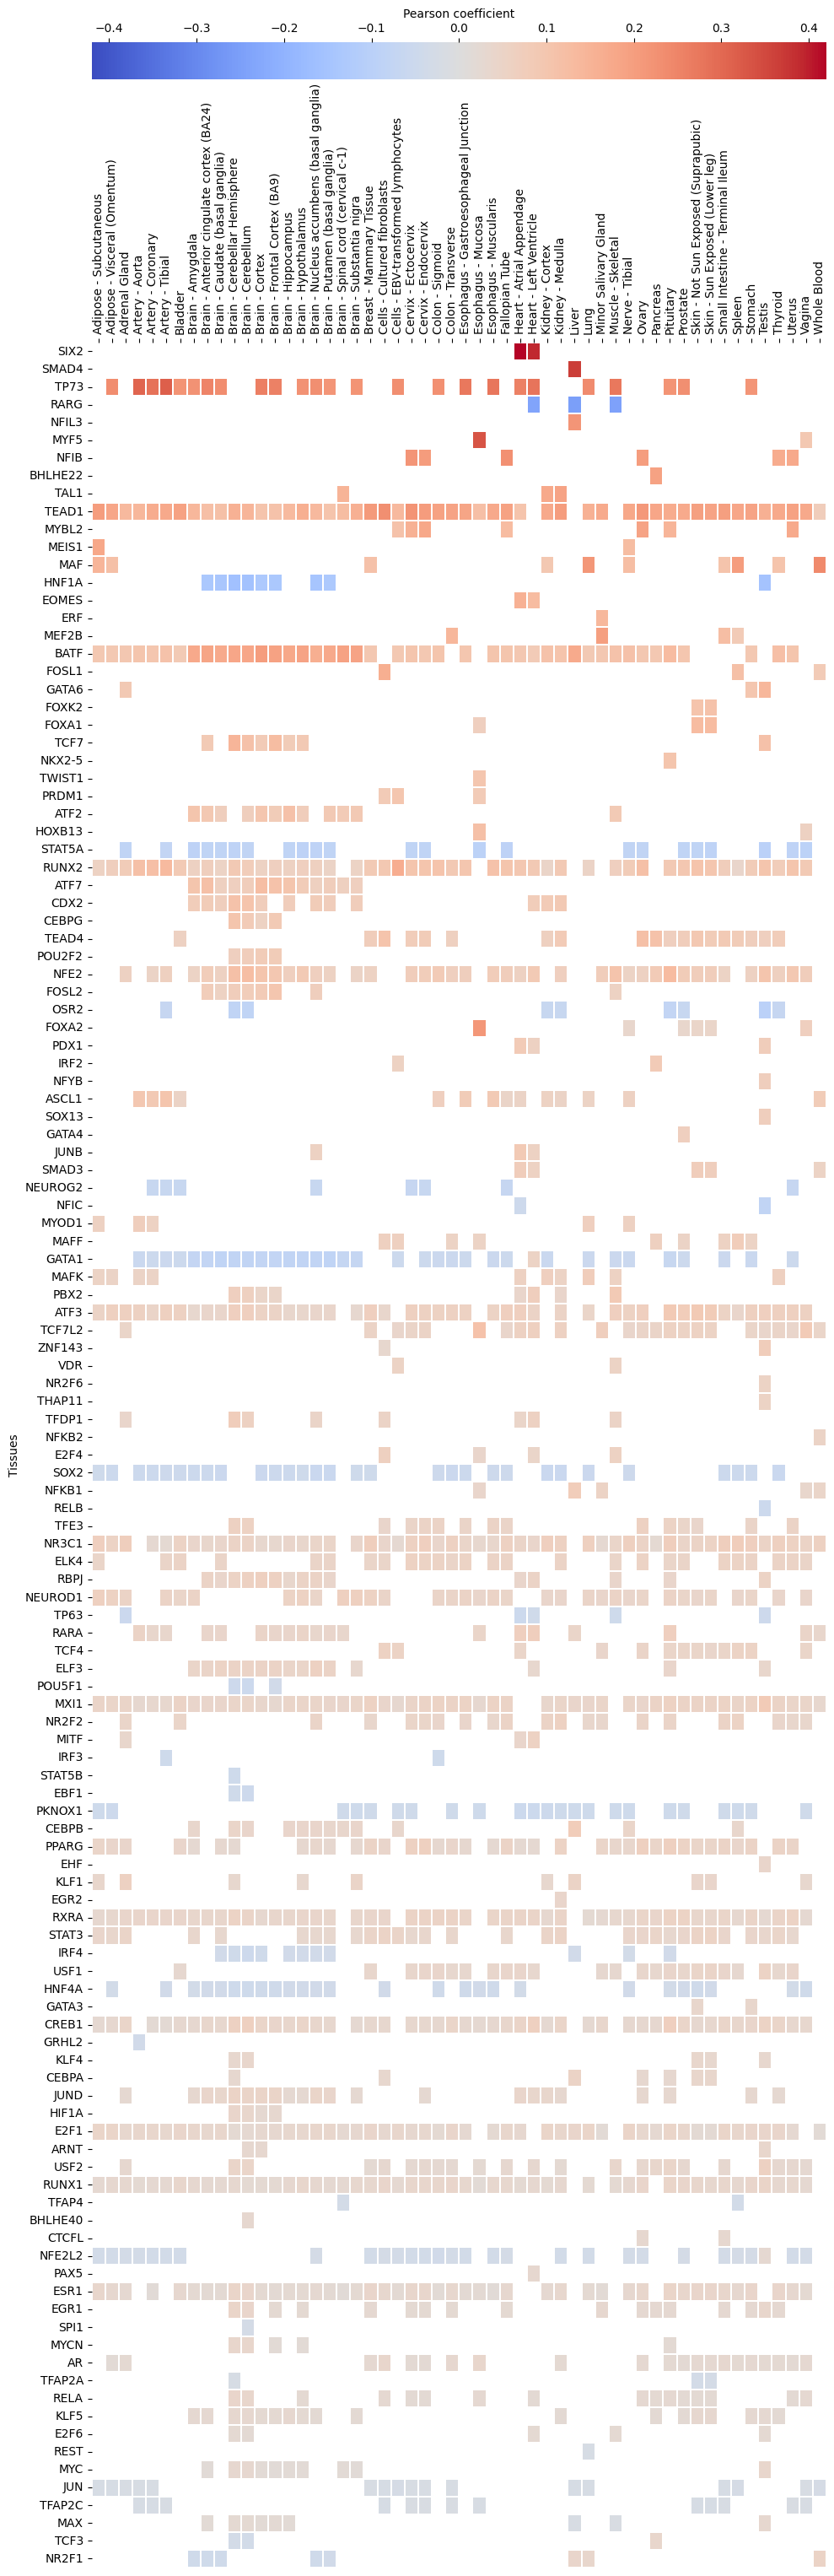

In [318]:
value_max = max(max(abs(r_df_filtered_by_p_value.max())), max(abs(r_df_filtered_by_p_value.min())))
value_min = -value_max


fig, ax = plt.subplots(figsize=(10, 35))
heatmap = sns.heatmap(r_df_filtered_by_p_value_remove_nan_rows_sort_by_mean, cmap='coolwarm', fmt=".2f", linewidths=0.01,vmin=value_min, vmax=value_max, cbar_kws={"orientation": "horizontal", "location":"top", "label":"Pearson coefficient", "pad":0.09})
#plt.title('Genexpression in different tissues')
plt.xlabel('TFBS')
plt.ylabel('Tissues')

ax.xaxis.tick_top()
ax.set_xlabel("")
ax.xaxis.set_label_position("top")
plt.xticks(rotation=90)


plt.tight_layout()
fig.savefig("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Single_TFBS/Heatmap/Pearson_filtered_remove_p_sort_by_mean_withoutNAN.png")
plt.show()